# Week 1: Meeting Date: 12/13/2017
## Goals: 
1. Get introduced to machine learning terminologies.
2. The steps involved in building any machine learning model
3. Problems involved in applying machine learning

Study Resources:
1. [Machine Learning - A Probabilistic Perspective](http://www.cs.ubc.ca/~murphyk/MLbook/pml-intro-5nov11.pdf)
2. [Hands On Machine Learning](https://www.safaribooksonline.com/library/view/hands-on-machine-learning/9781491962282/ch01.html) (Requires access to safari books online)


## Goal of Machine Learning
The goal of machine learning is to develop methods that
can automatically detect patterns in data, and then to use the uncovered patterns to predict
future data or other outcomes of interest.

## Applications
Fields Ripe for applying Machine Learning(includes but not limited to)
1. Computer Vision
2. Robotics
3. Text Processing(Natural Language Processing)

Almost any field that you can think of right now, has machine learning applied to it in one form or the other. Although the complexity of the algorithms involved in them may vary.

## What is needed?
Machine Learning is less fun without understanding the math behind the algorithms. Although, it is not the objective of this study group to delve into the math, it certainly can act as a helpful resource for motivated people.

In that vein, here are the math topics that you might want to start learning.
1. Multivariate Calculus
2. Probability
3. Linear Algebra
4. Basic Computer Programming

## Lets look at some of the Machine Learning terms by building a machine learning model
1. Dataset
2. Features
3. Labels
4. Classification vs Regression

In [1]:
## Load Sample dataset
from sklearn.datasets import fetch_mldata
# Dataset - D
D = fetch_mldata("MNIST original", data_home="../data") #Takes a long time. TODO: Bypass this 

1. Features - Attributes of the input data(aka Attributes or Covariates)
2. Labels - Target(aka Result/Truth)
3. Common Convention is to call features as X and labels as y

In [12]:
X = D["data"]
y = D["target"]

In [11]:
print("Feature Shape", X.shape)
print("Target Matrix shape", y.shape)

Feature Shape (70000, 784)
Target Matrix shape (70000,)


In [20]:
print("Viewing a single input of shape(1,784).\n", X[0])

Viewing a single input of shape(1,784).
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  51 159 253 159  50   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0  48 238 252 252 252 237   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0  54 227 253 252 239 233 252  57   6   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202  84 252
 253 122   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0 163 2

## Question
1. What can you infer from this sample datapoint? Try to infer as many patterns/characteristics/attributes as possible

In [25]:
print("Label for the same input", y[0])
print("Labels for some more input", y[:10000])

Label for the same input 0.0
Labels for some more input [ 0.  0.  0. ...,  1.  1.  1.]


### 1. Numbers are hard to interpret by humans but machines prefer to interpret numbers
### 2. A very common, important and most time consuming first step to build any machine learning model is to analyze the data to make reasonable inferences about the data we are working with. Visual Analysis is often preferred as a first step because humans can quickly interpret them.

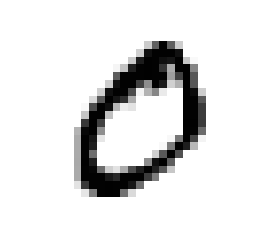

In [50]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

def display_image(img):
    some_digit = img
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
           interpolation="nearest")
    plt.axis("off")
    plt.show()

display_image(X[0])

## Training Set
Usually a portion of the dataset(D) that is reserved for training the ML model.
## Test Set
Usually a portion of the dataset(D) that is reserved for testing the ML model.

Note: 
1. Training Set and Test set should be mutually exclusive.
2. There are different ways to prepare this training set and test set. Most common one is called cross validation folds. We will discuss this later.

In [28]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

### Question: 
1. What is the size of this training data and target?
2. What is the size of the test data and target?

## Classification vs Regression
1. Output Variables can in principle be anything, but if they fall within a finite set of classes - we call it a categorial variable or nominal variable - Classfication
2. If the output variable is real values then the machine learning model is called a Regression.

In [29]:
import numpy as np
np.unique(y)

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9.])

## Question:
1. What do we have here? Classification Problem or Regression Problem?

In [31]:
#Earlier we had mentioned that there are multiple ways to prepare the train data and test data.
#What we have below is the most naive way. 
#A random shuffle.
shuffle_index = np.random.permutation(60000) #Shuffle numbers 0 to 59999
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index] #Shuffle the train data

## Questions
1. Why do we have to shuffle the data?
2. You see the training data shuffled here. Should we shuffle the test_data too?

### Lets the following learn from building a Machine Learning Model

1. Classifier
2. Binary Classifiers
3. MultiClass Classifier.
3. MultiLabel Classifier
4. MultiOutput Classifier

## Question
1. Just by looking at the names above, can you guess what's the difference in the output produced by these classifiers?

## Machine Learning model
The term "model" is one of the overused and least described terms in ML. A Model is a system that has been "trained" to detect patterns from a dataset and is ready to make predictions on any input.

Lets look at a very simple, hand wavy version of model.

You might have seen posts in so many useless social media sites like the one shown below:

If f(9, 3) = 21, f(6,9) = 21, f(3, 8) = 14, What is f(4,5)?
The human mind is so fast to recognize the pattern from the three data points and three target values, our human mind is so quick to recognize the pattern and predict the answer 13. It also correctly "learns" that the underlying function producing the pattern is "f(x,y) = 2x + y".

Think of the ML model as something that can learn this on a really huge dataset

In [38]:
from sklearn.linear_model import SGDClassifier #Stochastic Gradient Classifier. Don't worry about this now.

In [37]:
scaler = StandardScaler()
sgd = SGDClassifier(random_state=13, verbose=1)
X_train_scaled = scaler.fit_transform(X_train.astype(np.float64))
sgd.fit(X_train, y_train)

/anaconda2/envs/ml3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 6801.30, NNZs: 617, Bias: -153.117715, T: 60000, Avg. loss: 37420.485026
Total training time: 0.07 seconds.
-- Epoch 2
Norm: 4222.04, NNZs: 634, Bias: -167.458963, T: 120000, Avg. loss: 5183.638390
Total training time: 0.14 seconds.
-- Epoch 3
Norm: 3291.77, NNZs: 641, Bias: -175.614238, T: 180000, Avg. loss: 2816.025641
Total training time: 0.21 seconds.
-- Epoch 4
Norm: 2704.40, NNZs: 642, Bias: -180.798345, T: 240000, Avg. loss: 1984.087809
Total training time: 0.30 seconds.
-- Epoch 5
Norm: 2333.12, NNZs: 647, Bias: -184.824344, T: 300000, Avg. loss: 1516.939730
Total training time: 0.38 seconds.
-- Epoch 1
Norm: 4627.12, NNZs: 579, Bias: -20.102713, T: 60000, Avg. loss: 18909.146168
Total training time: 0.08 seconds.
-- Epoch 2
Norm: 2990.30, NNZs: 606, Bias: -23.759083, T: 120000, Avg. loss: 3016.850642
Total training time: 0.15 seconds.
-- Epoch 3
Norm: 2270.97, NNZs: 614, Bias: -25.017077, T: 180000, Avg. loss: 1681.760200
Total training time: 0.22 seconds.
-- 

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    3.9s finished


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=13, shuffle=True,
       tol=None, verbose=1, warm_start=False)

## Lets look at all the parameters to a typical ML model
The above steps spits out a buunch of words that are new and alien.

They are ordered in terms of importance. Items marked as * requires a deeper understanding of what happens inside attempts to learn model.
1. Loss - A parameter to measure "how far off" you are from the ground truth. A model can learn nothing if doesn't have an understanding how to "measure" itself. If you go back to the analogy described earlier with f(x,y) = 2x + y, your mind arrived at this solution after trying a couple of functions like this f(x, y) = 7y. This function works for datapoint 1- f(7,3) but after you look at the second datapoint f(6,9), your mind correctly excluded this function from consideration because 7(9) = 63. The loss = 63 - 21 = 42 is so large.
2. Norm* - Normalization Term (aka Regularization term, Penalty).
3. Bias* - Bias Term
4. Epoch - Full iteration of the training set

## What happended behind the scenes?
1. A model got trained. How?
2. It took the training dataset(60000 samples)
3. Divided them into batches of arbitrary size(batch_size usually a power of 2. Ex:128)
4. It looked at a batch of data(say 128 examples and its corresponding ground truth value)
5. Tried to learn a function(aka decision function) - Just like how your mind learned a function.
6. Looked at another set of data(next batch 128 samples - Tried to apply the function that it learned. Evaluates itself using the loss function that you passed to it. Based on the loss function, it corrects the learned function by fine tuning its hyperparameters.
7. Moves to the next data set until it finishes the entire training dataset.
8. This process of iterating though the entire training set in batches is called one Epoch.
9. After an epoch, you evaluate the model if it meets the terminating condition.
10. If it meets the terminating condition, exit. If not shuffle the data and repeat.
11. Terminating condition can be something as simple as an arbitrary number of epochs(say 50) or you can use a evaluation function like RMSE(Root Mean Squared Error)

## Question
1. What is a hyperparameter? Try to think of this using the simpler example f(x,y) = 2x + y
2. Why is it important to shuffle the data after en epoch?
3. Step 9 says we should evaluate our model before calling the epoch done. On what data should we evaluate our model? Try to think why training/test can/can't be used for the evaluation purposes?

## Lets try to see if our model anything


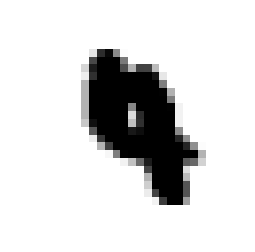

In [53]:
display_image(X_test[5000]) #Pick an arbitrary image from the dataset and visualize it so we know what to expect

In [56]:
# Alight, my trained ML model, can you make a prediction for me?
sgd.predict(X_test[5000].reshape(1,-1)) #Randomly 

array([ 4.])

Me: Alright, my ML model you say that it's a 4 but if you meet my professors who evaluate my exam papers they'd say that I write my 9 that way. #HumansVsAI

AI: No. It's a 4. Have a look at the ground truth values if you have any doubts.

Me: Alright.

In [57]:
y_test[5000]

4.0

Me: &lt;Insert your favorite man beating machine with a baseball bat meme>

## Lets try to evaluate our ML model

In [67]:
## Evaluation Functions and Validation Schemes
from sklearn.model_selection import cross_val_score, cross_val_predict ## Cross Validation. See below
y_train_pred = cross_val_predict(sgd, X_train, y_train, cv=5) ## 5 Fold Cross Validation

/anaconda2/envs/ml3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 7957.05, NNZs: 614, Bias: -166.090636, T: 47995, Avg. loss: 51435.649121
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4954.34, NNZs: 625, Bias: -180.749789, T: 95990, Avg. loss: 6512.361527
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 3825.52, NNZs: 629, Bias: -189.162078, T: 143985, Avg. loss: 3708.960640
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 3212.69, NNZs: 632, Bias: -194.264126, T: 191980, Avg. loss: 2471.820757
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 2739.28, NNZs: 633, Bias: -198.141969, T: 239975, Avg. loss: 1919.245649
Total training time: 0.29 seconds.
-- Epoch 1
Norm: 5821.99, NNZs: 577, Bias: -19.425477, T: 47995, Avg. loss: 24299.635070
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3600.82, NNZs: 594, Bias: -23.314097, T: 95990, Avg. loss: 3595.182455
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 2724.11, NNZs: 602, Bias: -24.475681, T: 143985, Avg. loss: 2008.292873
Total training time: 0.16 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished
/anaconda2/envs/ml3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 7684.62, NNZs: 614, Bias: -177.343446, T: 47998, Avg. loss: 48726.966291
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 4907.80, NNZs: 626, Bias: -191.657338, T: 95996, Avg. loss: 6377.986202
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 3769.59, NNZs: 629, Bias: -199.702117, T: 143994, Avg. loss: 3450.860659
Total training time: 0.16 seconds.
-- Epoch 4
Norm: 3125.56, NNZs: 635, Bias: -204.644049, T: 191992, Avg. loss: 2319.778924
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2726.74, NNZs: 637, Bias: -208.647697, T: 239990, Avg. loss: 1799.708363
Total training time: 0.27 seconds.
-- Epoch 1
Norm: 5821.92, NNZs: 577, Bias: -52.949635, T: 47998, Avg. loss: 26780.386832
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 3670.32, NNZs: 598, Bias: -56.951265, T: 95996, Avg. loss: 3851.249344
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 2762.46, NNZs: 602, Bias: -59.256502, T: 143994, Avg. loss: 2194.531382
Total training time: 0.16 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished
/anaconda2/envs/ml3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 8036.06, NNZs: 619, Bias: -138.194909, T: 48000, Avg. loss: 47751.339790
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5053.73, NNZs: 626, Bias: -153.539113, T: 96000, Avg. loss: 6272.438419
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 3864.83, NNZs: 628, Bias: -161.370085, T: 144000, Avg. loss: 3680.265347
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 3212.26, NNZs: 633, Bias: -166.993017, T: 192000, Avg. loss: 2546.745245
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2715.94, NNZs: 636, Bias: -170.979278, T: 240000, Avg. loss: 1972.343760
Total training time: 0.28 seconds.
-- Epoch 1
Norm: 5720.14, NNZs: 564, Bias: -32.048773, T: 48000, Avg. loss: 26514.140551
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3533.00, NNZs: 589, Bias: -35.889479, T: 96000, Avg. loss: 3909.226137
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 2703.57, NNZs: 599, Bias: -37.633221, T: 144000, Avg. loss: 2255.190147
Total training time: 0.17 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished
/anaconda2/envs/ml3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 7861.06, NNZs: 615, Bias: -166.499010, T: 48003, Avg. loss: 44470.296757
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 5083.21, NNZs: 636, Bias: -180.428411, T: 96006, Avg. loss: 5885.740441
Total training time: 0.12 seconds.
-- Epoch 3
Norm: 3822.99, NNZs: 637, Bias: -188.162620, T: 144009, Avg. loss: 3378.420722
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 3179.40, NNZs: 641, Bias: -193.707818, T: 192012, Avg. loss: 2284.830592
Total training time: 0.23 seconds.
-- Epoch 5
Norm: 2774.27, NNZs: 644, Bias: -197.987980, T: 240015, Avg. loss: 1807.757155
Total training time: 0.28 seconds.
-- Epoch 1
Norm: 5701.32, NNZs: 560, Bias: -65.354483, T: 48003, Avg. loss: 26307.257721
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 3591.69, NNZs: 590, Bias: -70.595075, T: 96006, Avg. loss: 3588.973728
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 2648.85, NNZs: 603, Bias: -72.212031, T: 144009, Avg. loss: 1955.757309
Total training time: 0.16 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.9s finished
/anaconda2/envs/ml3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


-- Epoch 1
Norm: 7899.75, NNZs: 596, Bias: -165.597139, T: 48004, Avg. loss: 41367.672921
Total training time: 0.05 seconds.
-- Epoch 2
Norm: 4923.56, NNZs: 623, Bias: -180.325307, T: 96008, Avg. loss: 6409.546572
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 3781.25, NNZs: 628, Bias: -187.806200, T: 144012, Avg. loss: 3587.717981
Total training time: 0.17 seconds.
-- Epoch 4
Norm: 3164.62, NNZs: 630, Bias: -193.237066, T: 192016, Avg. loss: 2455.060674
Total training time: 0.22 seconds.
-- Epoch 5
Norm: 2737.17, NNZs: 633, Bias: -196.880900, T: 240020, Avg. loss: 1875.842576
Total training time: 0.28 seconds.
-- Epoch 1
Norm: 6107.77, NNZs: 554, Bias: -28.924151, T: 48004, Avg. loss: 27154.998363
Total training time: 0.06 seconds.
-- Epoch 2
Norm: 3695.06, NNZs: 587, Bias: -32.142625, T: 96008, Avg. loss: 3662.676862
Total training time: 0.11 seconds.
-- Epoch 3
Norm: 2775.62, NNZs: 591, Bias: -33.850247, T: 144012, Avg. loss: 2041.087811
Total training time: 0.17 seconds.
-- Ep

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.8s finished


## K-Fold Cross Validation
![alt K-fold Cross Validation](https://raw.githubusercontent.com/ArulselvanMadhavan/ml-study-group/master/resources/images/k-fold-diagram.png "K-Fold cross validation")

Note: Test Fold is also called as Validation Set in some literature.

[Source:http://karlrosaen.com/ml/learning-log/2016-06-20/](http://karlrosaen.com/ml/learning-log/2016-06-20/)

## Question
1. Why is Cross Validation important?

In [68]:
y_train_pred[:10] ##Lets look at the predictions for the first 10 images.

array([ 0.,  5.,  1.,  5.,  7.,  3.,  1.,  9.,  4.,  2.])

## Question
1. Can you define the notion of accuracy for our problem? When do you say a prediction is correct for a single image? How do you accumulate that notion for the entire data set?

In [78]:
## Accuracy 
def accuracy(truth, predictions):
    return (np.sum(truth == predictions) / truth.size)

In [80]:
accuracy(y_train, y_train_pred) #Train Accuracy of around 84%

0.84535000000000005

## Question
It should be fairly trivial to define what they mean but can you reason about where they should be used in the lifecycle of a ML model and what reasonable inferences can be made from them?
1. Training Set Accuracy
2. Validation Set Accuracy
3. Test Set Accuracy

## How can we improve accuracy?

1. As I mentioned earlier machines can interpret numbers well and humans can interpret information from arrregated data(in most cases aggregated data is represented via visual medium). It is very effective compared to just looking at numbers.
2. One of the tools that they use to understand model performance and make reasonable tweaks to ML model is called confusion matrix.

In [66]:
from sklearn.metrics import confusion_matrix
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5526,    2,   53,   20,   10,   30,   43,   19,  214,    6],
       [   5, 6457,   45,    7,    8,   18,    9,   50,  134,    9],
       [  41,   75, 5064,   79,   68,   20,  145,  125,  320,   21],
       [  75,   72,  361, 4316,   18,  455,   37,  119,  600,   78],
       [  20,   42,   54,    6, 5018,   26,   70,   53,  356,  197],
       [ 101,   47,   73,  162,   90, 3811,  118,   60,  860,   99],
       [  55,   33,  156,    1,   69,   72, 5363,   16,  147,    6],
       [  22,   39,   53,   17,   64,   15,    7, 5735,  118,  195],
       [  57,  211,  120,   95,   42,  114,   43,   77, 5011,   81],
       [  33,   53,   29,   55,  187,  160,    3,  612,  397, 4420]])

In [82]:
conf_mx.shape #Confusion matrix is a num_of_classes x num_of_classes matrix.

(10, 10)

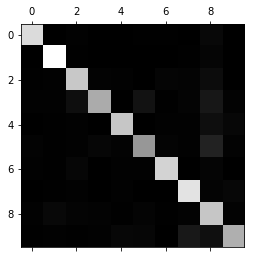

In [83]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

# Question
1. By just looking at the picture, can you reason why this is a handy tool to understand and tweak a ML model?

# Work In Progress Section

## Problems in Machine Learning
1. Long Tail Problem
![alt text](https://github.com/ArulselvanMadhavan/ml-study-group/raw/master/resources/images/Long_Tail_Problem.jpg "Long Tail Problem")
[Source: http://www.longtail.com/about.html](http://www.longtail.com/about.html)

## TODO
1. One Vs One Classifier
2. One Vs Rest Classifier